In [ ]:
# @title 🛠️ 1. Setup Environment (restart the session after installation)
!git clone https://github.com/Oumar199/LiverVolumetry.git
!pip install -e LiverVolumetry/liver-volumetry -qqq


print("\n✅ Environment ready. Runtime needs to restarted !")

import os
os._exit(0)


Cloning into 'LiverVolumetry'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 340 (delta 20), reused 29 (delta 15), pack-reused 298 (from 1)
Receiving objects: 100% (340/340), 192.86 KiB | 3.38 MiB/s, done.
Resolving deltas: 100% (171/171), done.
Filtering content: 100% (2/2), 183.34 MiB | 28.89 MiB/s, done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s 

In [2]:
# @title 💻 Verify GPU Configuration (Activate GPU for faster execution)

from google.colab import output
import torch

if not torch.cuda.is_available():
    from IPython.display import display, Markdown
    display(Markdown("## ❌ **ERROR : GPU is not detected**"))
    display(Markdown("Go to **Runtime > Change runtime type** and selection **T4 GPU**."))

    output.eval_js('alert("Missing GPU !")')
    raise SystemError("The GPU must be activated to continue.")
else:
    print("✅ GPU détecté :", torch.cuda.get_device_name(0))


## ❌ **ERROR : GPU is not detected**

Go to **Runtime > Change runtime type** and selection **T4 GPU**.

SystemError: The GPU must be activated to continue.

Choose an option:
1. Use default sample image
2. Upload your own image
Enter 1 or 2: 1
--2026-02-13 00:47:37--  https://github.com/Oumar199/LiverVolumetry/blob/main/images/output_liver_segmentation.jpg?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Oumar199/LiverVolumetry/raw/refs/heads/main/images/output_liver_segmentation.jpg [following]
--2026-02-13 00:47:38--  https://github.com/Oumar199/LiverVolumetry/raw/refs/heads/main/images/output_liver_segmentation.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Oumar199/LiverVolumetry/refs/heads/main/images/output_liver_segmentation.jpg [following]
--2026-02-13 00:47:38--  https://raw.githubusercontent.com/Oumar199/LiverVolumetry/refs/heads/main/images/output_liver_segmentation.jpg
Re

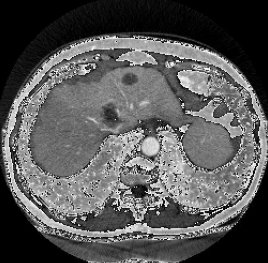

In [1]:
# @title 📂 2. Data Preparation
from google.colab import files
from IPython.display import Image, display
import os

print("Choose an option:")
print("1. Use default sample image")
print("2. Upload your own image")

choice = input("Enter 1 or 2: ")

IMAGE_PATH = 'images/output_liver_segmentation.jpg'

if choice == '2':
    uploaded = files.upload()
    if uploaded:
        filename = list(uploaded.keys())[0]
        IMAGE_PATH = os.path.join('images', filename)
        print(f"✅ Uploaded: {filename}")
else:
    if not os.path.exists(IMAGE_PATH):
        !mkdir -p images
        !wget -O {IMAGE_PATH} https://github.com/Oumar199/LiverVolumetry/blob/main/images/output_liver_segmentation.jpg?raw=true
    print("✅ Using default sample.")

display(Image(IMAGE_PATH, width=400))


/content/LiverVolumetry
Loading models... (this may take a moment)
📥 CPU Loading...
✅ CPU MODELS READY
Running segmentation pipeline...

📊 Calculated Volumes: {'liver_volume_cm3': 9.182208000000001, 'tumor_volume_cm3': 0.560224, 'tumor_ratio_percent': 6.101190476190476}


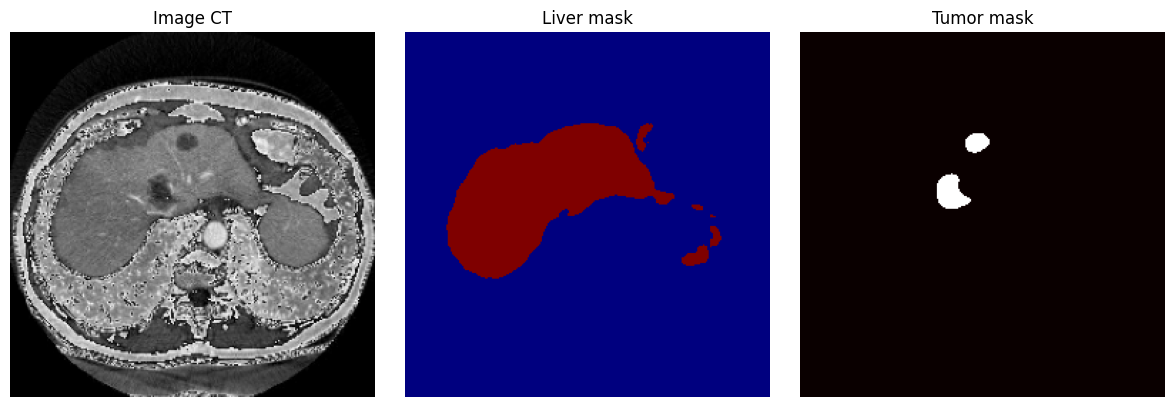

In [2]:
# @title 🔬 3.2 Segmentation & Volumetry
%cd LiverVolumetry

from liver_volumetry.interpretation.analysis import get_models, load_image, segment_image, identify_volumes
from liver_volumetry.utils import liver_tumor_pipeline_py as ltp

# 1. Load models and image
print("Loading models... (this may take a moment)")
liver_model, tumor_model = get_models()
img = load_image(IMAGE_PATH)

# 2. Run Segmentation
print("Running segmentation pipeline...")
liver_mask, tumor_mask = segment_image(img, (liver_model, tumor_model))

# 3. Calculate Volumetry
# Returns overlay and dictionary with volumes (e.g., {'liver': 1500, 'tumor': 50})
overlay, volumes = identify_volumes(img, (liver_mask, tumor_mask))

print(f"\n📊 Calculated Volumes: {volumes}")

# 4. Plot Results
# Set get_image=False to display directly in the notebook
ltp.plot_results(
    img_array=img,
    liver_mask=liver_mask,
    tumor_mask=tumor_mask,
    get_image=False
)


In [3]:
# @title 🚀 Run Local AI Analysis (Medgemma-1.5-4b)
from liver_volumetry.interpretation.analysis import analysis_image
from liver_volumetry.utils import liver_tumor_pipeline_py as ltp
from IPython.display import display, Markdown

try:
    print("⏳ Loading Medgemma model (this requires significant VRAM)...")
    # 1. Load the quantized Medgemma model and processor
    llm_model, processor = ltp.load_medgemma_4bit()

    # 2. Run full pipeline (Segmentation + Volumetry + AI Interpretation)
    # Returns: Medical analysis text, calculated volumes, and base64 plot string
    # We pass 'img' and 'models' (liver_model, tumor_model) from the previous cell
    models = (liver_model, tumor_model)
    result = analysis_image(img, models, llm_model, processor, get_image=True)

    # 3. Extract and display the medical interpretation
    # Splitting the result to isolate the generated clinical text
    analysis = result[0].split("\nmodel\n", 1)[1]

    print("\n" + "="*30)
    print("📋 CLINICAL INSIGHT")
    print("="*30)

    display(Markdown(analysis))

except Exception as e:
    print(f"❌ Local analysis failed: {e}")
    print("\n💡 Suggestion: If you lack local GPU resources, please use the 'RunPod Remote Analysis' section below.")


⏳ Loading Medgemma model (this requires significant VRAM)...


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading weights:   0%|          | 0/883 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.



📋 CLINICAL INSIGHT


This is a CT scan of the abdomen showing a small liver lesion. The liver volume is 9.18 cm3, and the tumor volume is 0.56 cm3. The tumor-to-liver ratio is 6.10%. This suggests a small liver lesion, which may be a benign or malignant tumor. Further evaluation is needed to determine the nature of the lesion.

**Disclaimer:** This is an AI-generated interpretation and should not be used for medical diagnosis. A qualified healthcare professional should be consulted for any medical concerns.